# Upload and Extract

In [0]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [0]:
!unzip -q z6J7.zip

warning [z6J7.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [z6J7.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #363102).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


In [0]:
!curl --upload-file dataset.zip https://transfer.sh/dataset.zip

In [1]:
!wget https://0x0.st/z6J7.zip

--2019-12-08 14:33:12--  https://0x0.st/z6J7.zip
Resolving 0x0.st (0x0.st)... 136.243.89.164, 2a01:4f8:171:1a2::3
Connecting to 0x0.st (0x0.st)|136.243.89.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454498692 (433M) [application/zip]
Saving to: ‘z6J7.zip’

z6J7.zip            100%[===================>] 433.44M  20.2MB/s    in 23s     

2019-12-08 14:33:36 (19.2 MB/s) - ‘z6J7.zip’ saved [454498692/454498692]



In [2]:
!mv z6J7.zip dataset.zip
!unzip -q dataset.zip

warning [dataset.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [dataset.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #363102).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


In [3]:
!ls

dataset  dataset.zip  sample_data


## Download and extract the dataset
---
### Download link expires on October 24, 2019

In [0]:
!rm -r *
!wget https://filebin.net/k7zrivbd8unygg0c/dataset.zip
!unzip -q dataset.zip

In [0]:
!unzip -q dataset.zip

[dataset.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dataset.zip or
        dataset.zip.zip, and cannot find dataset.zip.ZIP, period.


# Set up working directory

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

working_dir =   "/content"
train_dir   =   "/content/dataset/train/"
val_dir     =   "/content/dataset/val/"
test_dir    =   "/content/dataset/test/"
saving_dir  =   "/content/gdrive/My Drive/Purdue Course/Data Mining"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Count the number of images in the train directory
### This cell is not required, hence commented out

In [0]:
# %cd -q $train_dir
# import os
# ls = os.listdir()
# ls.sort(key=int)
# cnt=0
# for folder in ls:
#     %cd -q $folder
#     cnt = cnt + len(os.listdir())
#     print(folder, len(os.listdir()))
#     %cd -q "../"
    
# print('Total: ' + str(cnt))
# %cd -q $working_dir

# আসল খেলা

In [0]:
from keras.callbacks import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

Using TensorFlow backend.


In [0]:
filepath = working_dir + "/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('training.log')

callbacks_list = [checkpoint, csv_logger]

## Architecture 
---
### Make changes only to this block to try out different models
---

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3,)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(122, activation='softmax'))


sgd = optimizers.SGD(lr=0.1)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 290135 images belonging to 122 classes.
Found 36223 images belonging to 122 classes.


In [0]:
model.fit_generator(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        callbacks=callbacks_list,
        verbose = 2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





9067/9067 [==============================] - 314s 35ms/step - loss: 2.2819 - acc: 0.4332 - val_loss: 0.7819 - val_acc: 0.7896

Epoch 00001: val_acc improved from -inf to 0.78958, saving model to /content/epochs:001-val_acc:0.790.hdf5
Epoch 2/50
9067/9067 [==============================] - 296s 33ms/step - loss: 1.2414 - acc: 0.6612 - val_loss: 0.6235 - val_acc: 0.8305

Epoch 00002: val_acc improved from 0.78958 to 0.83049, saving model to /content/epochs:002-val_acc:0.830.hdf5
Epoch 3/50
9067/9067 [==============================] - 301s 33ms/step - loss: 1.0849 - acc: 0.7048 - val_loss: 0.5346 - val_acc: 0.8564

Epoch 00003: val_acc improved from 0.83049 to 0.85639, saving model to /content/epochs:003-val_acc:0.856.hdf5
Epoch 4/50
9067/9067 [==============================] - 294s 32ms/step - loss: 1.0119 - acc: 0.7240 - val_loss: 0.5002 - val_acc: 0.8632

Epoch 00004: val_ac

In [0]:
from google.colab import files
import os

def download_all(model_name, max_epoch=25):
    ls = os.listdir()
    
    downloadables = []
    for file in ls:
        if model_name in file and 'training.log' in file:
            files.download(file)
        elif model_name in file:
            downloadables.append(file)

    print(downloadables)
    files.download(sorted(downloadables, reverse=True)[0])    

download_all(get_model_name('vgg',batch_size=32))  

# Transfer Learning

In [0]:
from keras.applications import VGG16
from keras.applications import ResNet50V2
from keras.applications import InceptionV3

def get_base_model(base_model_type, initial_weights='imagenet'):
    if base_model_type == 'vgg':
        model = VGG16(include_top=False, weights=initial_weights, input_shape=(32,32, 3))
    elif base_model_type == 'inception':
        model = InceptionV3(include_top=False, weights=initial_weights, input_shape=(75,75, 3))
    elif base_model_type == 'resnet':
        model = ResNet50V2(include_top=False, weights=initial_weights, input_shape=(75,75, 3))

    return model

In [0]:
from keras.optimizers import SGD, Adam, RMSprop

def get_optimizer(optimizer_type, learning_rate):
    if optimizer_type == 'sgd':
        optimizer = SGD(learning_rate)
    elif optimizer_type == 'adam':
        optimizer = Adam(learning_rate)
    else: 
        optimizer = RMSprop(learning_rate)

    return optimizer

In [0]:
def get_image_width_height(base_model_type):
    if base_model_type == 'vgg':
        return 32, 32
    elif base_model_type == 'inception' or base_model_type == 'resnet':
      return 75, 75

In [0]:
from keras.preprocessing.image import ImageDataGenerator

def get_train_generators(image_width, image_height, batch_size):
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)


    train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(image_width, image_height),
            batch_size=batch_size,
            class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
            val_dir,
            target_size=(image_width, image_height),
            batch_size=batch_size,
            class_mode='categorical')
    
    return train_generator, validation_generator

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

def get_model(base_model_type, 
                      learning_rate=0.001, 
                      dropout=0.3, 
                      dense_layer_count=1, 
                      dense_layer_size=[128], 
                      optimizer_type='sgd',
                      train_base_model_layers=False):
    
    base_model = get_base_model(base_model_type)

    for layer in base_model.layers[:]:
        layer.trainable = train_base_model_layers
 
    # this is our model
    model = Sequential()
   
    # Add the vgg convolutional base model
    model.add(base_model)
 
    # Add new layers
    model.add(Flatten())
    for i in range(dense_layer_count):
        model.add(Dense(dense_layer_size[i], activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(122, activation='softmax'))
 
    # compile the model
    model.compile(loss='categorical_crossentropy',
                optimizer=get_optimizer(optimizer_type, learning_rate),
                metrics=['accuracy'])
 
    return model

In [0]:
from keras.callbacks import *


def get_model_name(base_model_type, batch_size=32, learning_rate=0.01, optimizer='sgd', special=''):
    return base_model_type + '_' + str(batch_size) + '_' + str(learning_rate) + '_' + str(optimizer) + special

def get_callbacks(base_model_type, batch_size=32, learning_rate=0.01, optimizer='sgd', special=''):
    model_name = get_model_name(base_model_type, batch_size, learning_rate, optimizer, special)
    filepath = saving_dir + "/"+model_name+".hdf5"

    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    csv_logger = CSVLogger(saving_dir + '/' + model_name + '_training.log')

    callbacks_list = [checkpoint, csv_logger]

    return callbacks_list

In [0]:
base_model_types = ['vgg', 'inception', 'resnet']
optimizers = ['sgd', 'adam', 'rmsprop']
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64]
epochs = [25, 50, 75]

In [0]:
for base_model_type in ['resnet']:
    image_width, image_height = get_image_width_height(base_model_type)
    for batch_size in [64]:
        train_generator, validation_generator = get_train_generators(image_width, image_height, batch_size)
        callbacks_list = get_callbacks(base_model_type, batch_size=batch_size)
        model = get_model(base_model_type)
        model.fit_generator(train_generator,
                            epochs=25,
                            validation_data=validation_generator,
                            callbacks=callbacks_list,
                            verbose = 2)
        #download_all(get_model_name(base_model_type,batch_size=32))

Found 290135 images belonging to 122 classes.
Found 36223 images belonging to 122 classes.

94674944/94668760 [==============================] - 8s 0us/step
Epoch 1/25
 - 699s - loss: 4.4176 - acc: 0.0820 - val_loss: 4.6850 - val_acc: 0.0607

Epoch 00001: val_acc improved from -inf to 0.06071, saving model to /content/gdrive/My Drive/Purdue Course/Data Mining/resnet_64_0.01_sgd.hdf5
Epoch 2/25
 - 689s - loss: 3.6190 - acc: 0.1975 - val_loss: 4.5678 - val_acc: 0.0846

Epoch 00002: val_acc improved from 0.06071 to 0.08464, saving model to /content/gdrive/My Drive/Purdue Course/Data Mining/resnet_64_0.01_sgd.hdf5
Epoch 3/25
 - 682s - loss: 3.1358 - acc: 0.2672 - val_loss: 4.7251 - val_acc: 0.0874

Epoch 00003: val_acc improved from 0.08464 to 0.08740, saving model to /content/gdrive/My Drive/Purdue Course/Data Mining/resnet_64_0.01_sgd.hdf5
Epoch 4/25
 - 679s - loss: 2.8360 - acc: 0.3156 - val_loss: 4.6465 - val_acc: 0.1031

Epoch 00004: val_acc improved from 0.08740 to 0.10308, saving mo

In [0]:
batch_size = 16
for base_model_type in ['vgg']:
    image_width, image_height = get_image_width_height(base_model_type)
    for learning_rate in learning_rates:
        train_generator, validation_generator = get_train_generators(image_width, image_height, batch_size)
        callbacks_list = get_callbacks(base_model_type, batch_size=batch_size, learning_rate=learning_rate)
        model = get_model(base_model_type, learning_rate=learning_rate)
        model.fit_generator(train_generator,
                            epochs=25,
                            validation_data=validation_generator,
                            callbacks=callbacks_list,
                            verbose = 2)


Found 290135 images belonging to 122 classes.
Found 36223 images belonging to 122 classes.




58892288/58889256 [==============================] - 5s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
 - 408s - loss: 3.4148 - acc: 0.1938 - val_loss: 2.5052 - val_acc: 0.3836

Epoch 00001: val_acc improved from -inf to 0.38362, saving model to /content/gdrive/My Drive/Purdue Course/Data Mining/vgg_16_0.01_sgd.hdf5
Epoch 2/25
 - 393s - loss: 2.5638 - acc: 0.3442 - val_loss: 2.1413 - val_acc: 0.4572

Epoch 00002: val_acc improved from 0.38362 to 0.45717, saving model to /content/gdrive/My Drive/Purdue Course/Data Mining/vgg_16_0.01_sgd.hdf5
Epoch 3/25
 - 388s - loss: 2.3353 - acc: 0.3933 - val_loss: 1.9683 - val_acc: 0.4971

Epoch 00003: val_acc improved from 0.45717 to 0.49706, saving model to /content

In [0]:
batch_size = 16
learning_rate = .01
for base_model_type in ['vgg']:
    image_width, image_height = get_image_width_height(base_model_type)
    for optimizer in optimizers:
        train_generator, validation_generator = get_train_generators(image_width, image_height, batch_size)
        callbacks_list = get_callbacks(base_model_type, batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer)
        model = get_model(base_model_type, learning_rate=learning_rate, optimizer_type=optimizer)
        model.fit_generator(train_generator,
                            epochs=25,
                            validation_data=validation_generator,
                            callbacks=callbacks_list,
                            verbose = 2)


Found 290135 images belonging to 122 classes.
Found 36223 images belonging to 122 classes.
Epoch 1/25
 - 241s - loss: 3.7987 - acc: 0.0995 - val_loss: 3.1429 - val_acc: 0.1954

Epoch 00001: val_acc improved from -inf to 0.19543, saving model to /content/gdrive/My Drive/Purdue Course/Data Mining/vgg_16_0.01_adam.hdf5
Epoch 2/25
 - 244s - loss: 3.7382 - acc: 0.1073 - val_loss: 3.1643 - val_acc: 0.1928

Epoch 00002: val_acc did not improve from 0.19543
Epoch 3/25
 - 239s - loss: 3.7791 - acc: 0.1025 - val_loss: 3.2894 - val_acc: 0.1695

Epoch 00003: val_acc did not improve from 0.19543
Epoch 4/25
 - 239s - loss: 3.8465 - acc: 0.0955 - val_loss: 3.3811 - val_acc: 0.1472

Epoch 00004: val_acc did not improve from 0.19543
Epoch 5/25
 - 238s - loss: 3.8829 - acc: 0.0887 - val_loss: 3.3192 - val_acc: 0.1693

Epoch 00005: val_acc did not improve from 0.19543
Epoch 6/25
 - 239s - loss: 3.8839 - acc: 0.0891 - val_loss: 3.3788 - val_acc: 0.1555

Epoch 00006: val_acc did not improve from 0.19543
Ep

In [0]:
batch_size = 16
learning_rate = .01
base_model_type = 'vgg'
image_width, image_height = get_image_width_height(base_model_type)
optimizer = 'sgd'
train_generator, validation_generator = get_train_generators(image_width, image_height, batch_size)
callbacks_list = get_callbacks(base_model_type, batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer, special='_epochs_100')
model = get_model(base_model_type, learning_rate=learning_rate, optimizer_type=optimizer)
model.fit_generator(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    callbacks=callbacks_list,
                    verbose = 2)

Found 290135 images belonging to 122 classes.
Found 36223 images belonging to 122 classes.




58892288/58889256 [==============================] - 5s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100


KeyboardInterrupt: ignored

In [0]:
batch_size = 16
learning_rate = .01
base_model_type = 'vgg'
image_width, image_height = get_image_width_height(base_model_type)
optimizer = 'sgd'
train_generator, validation_generator = get_train_generators(image_width, image_height, batch_size)
callbacks_list = get_callbacks(base_model_type, 
                               batch_size=batch_size, 
                               learning_rate=learning_rate, 
                               optimizer=optimizer, 
                               special='_train_base_model_layers_True')
model = get_model(base_model_type, learning_rate=learning_rate, optimizer_type=optimizer, train_base_model_layers=True)
model.fit_generator(train_generator,
                    epochs=25,
                    validation_data=validation_generator,
                    callbacks=callbacks_list,
                    verbose = 2)

Found 290135 images belonging to 122 classes.
Found 36223 images belonging to 122 classes.




58892288/58889256 [==============================] - 5s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
 - 999s - loss: 0.9899 - acc: 0.7495 - val_loss: 0.3834 - val_acc: 0.8964

Epoch 00001: val_acc improved from -inf to 0.89636, saving model to /content/gdrive/My Drive/Purdue Course/Data Mining/vgg_16_0.01_sgd_train_base_model_layers_True.hdf5
Epoch 2/25
 - 990s - loss: 0.3846 - acc: 0.9021 - val_loss: 0.2751 - val_acc: 0.9273

Epoch 00002: val_acc improved from 0.89636 to 0.92734, saving model to /content/gdrive/My Drive/Purdue Course/Data Mining/vgg_16_0.01_sgd_train_base_model_layers_True.hdf5
Epoch 3/25
 - 991s - loss: 0.3032 - acc: 0.9227 - val_loss: 0.2489 - val_acc: 0.9344

Epoch 00003: val_acc 

inception_16_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/ClassifierVariation/inception_16_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.011440  4.805139  0.010573  4.851577
1      1  0.021476  4.752737  0.017779  4.851353
2      2  0.034760  4.652033  0.024101  4.838252
3      3  0.050697  4.514480  0.028490  4.822888
4      4  0.064056  4.385505  0.031030  4.815121


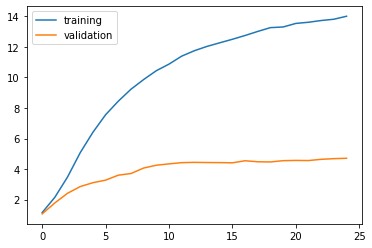

inception_32_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/ClassifierVariation/inception_32_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.010519  4.816176  0.011567  4.836000
1      1  0.016241  4.788171  0.015625  4.827858
2      2  0.022886  4.763591  0.018855  4.820901
3      3  0.029886  4.723063  0.020346  4.812631
4      4  0.036904  4.669393  0.022003  4.799895


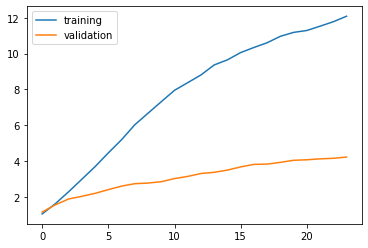

resnet_16_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/ClassifierVariation/resnet_16_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.171179  3.737904  0.087707  4.841535
1      1  0.332938  2.681423  0.100323  4.988600
2      2  0.395695  2.359185  0.104354  5.193492
3      3  0.431396  2.191930  0.106976  5.254037
4      4  0.451280  2.097820  0.113740  5.115405


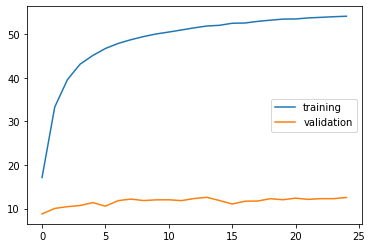

resnet_32_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/ClassifierVariation/resnet_32_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.126462  4.075748  0.086299  4.415862
1      1  0.268475  3.092751  0.106010  4.546548
2      2  0.338673  2.676550  0.116556  4.599729
3      3  0.383752  2.445159  0.122878  4.709013
4      4  0.414145  2.294422  0.134776  4.541613


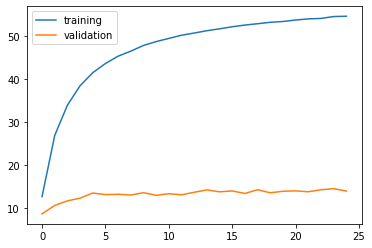

inception_64_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/ClassifierVariation/inception_64_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.009220  4.824749  0.011070  4.860748
1      1  0.011171  4.800406  0.011788  4.845286
2      2  0.013545  4.791178  0.011622  4.839253
3      3  0.017316  4.780582  0.013030  4.837579
4      4  0.021228  4.765726  0.013141  4.839722


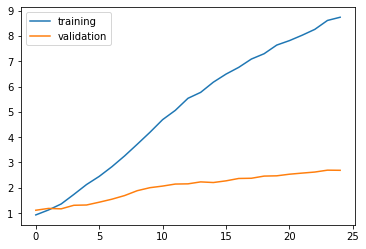

resnet_64_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/ClassifierVariation/resnet_64_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.079811  4.407529  0.060707  4.902593
1      1  0.193562  3.621157  0.074207  4.779986
2      2  0.263743  3.146423  0.078873  4.942068
3      3  0.310586  2.861925  0.089777  4.822912
4      4  0.344150  2.667072  0.093891  4.847908


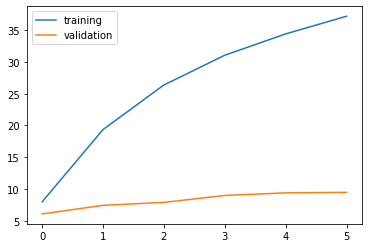

vgg_16_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/ClassifierVariation/vgg_16_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.199673  3.404826  0.392541  2.492030
1      1  0.351498  2.535580  0.448058  2.158636
2      2  0.400962  2.306192  0.477211  2.011683
3      3  0.429414  2.183206  0.523259  1.841527
4      4  0.446978  2.103474  0.527869  1.792269


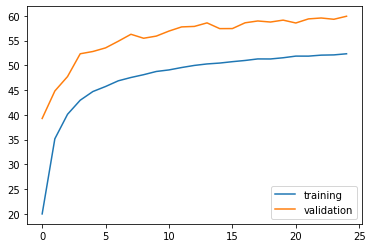

vgg_32_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/ClassifierVariation/vgg_32_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.025816  4.731758  0.050548  4.618808
1      1  0.053227  4.515627  0.086050  4.330903
2      2  0.079563  4.245053  0.148442  4.019482
3      3  0.106754  3.996155  0.199514  3.757433
4      4  0.133789  3.791730  0.240068  3.539006


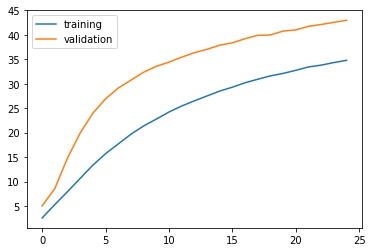

vgg_64_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/ClassifierVariation/vgg_64_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.014304  4.791297  0.019601  4.748691
1      1  0.023689  4.725493  0.037518  4.678424
2      2  0.038758  4.649814  0.070894  4.579177
3      3  0.053192  4.544770  0.097203  4.445385
4      4  0.065090  4.417512  0.118185  4.292381


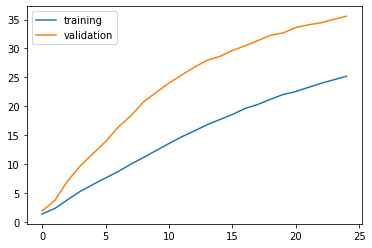


vgg_32_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/BatchVariation/vgg_32_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.025816  4.731758  0.050548  4.618808
1      1  0.053227  4.515627  0.086050  4.330903
2      2  0.079563  4.245053  0.148442  4.019482
3      3  0.106754  3.996155  0.199514  3.757433
4      4  0.133789  3.791730  0.240068  3.539006


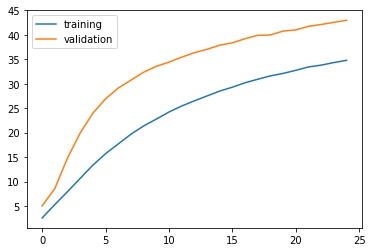

vgg_64_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/BatchVariation/vgg_64_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.014304  4.791297  0.019601  4.748691
1      1  0.023689  4.725493  0.037518  4.678424
2      2  0.038758  4.649814  0.070894  4.579177
3      3  0.053192  4.544770  0.097203  4.445385
4      4  0.065090  4.417512  0.118185  4.292381


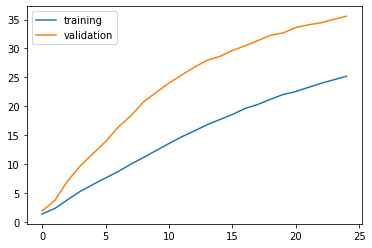

vgg_16_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/BatchVariation/vgg_16_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.199673  3.404826  0.392541  2.492030
1      1  0.351498  2.535580  0.448058  2.158636
2      2  0.400962  2.306192  0.477211  2.011683
3      3  0.429414  2.183206  0.523259  1.841527
4      4  0.446978  2.103474  0.527869  1.792269


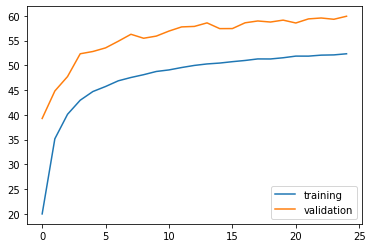


vgg_16_0.001_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/LearningRateVariation/vgg_16_0.001_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.041829  4.633211  0.117853  4.341133
1      1  0.098630  4.115723  0.201419  3.738771
2      2  0.147231  3.692936  0.262347  3.351756
3      3  0.188205  3.415639  0.305635  3.091671
4      4  0.220280  3.215824  0.336527  2.907161


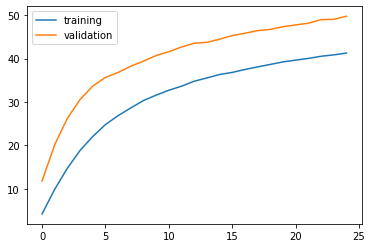

vgg_16_0.0001_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/LearningRateVariation/vgg_16_0.0001_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.013652  4.816687  0.019711  4.765928
1      1  0.020897  4.759542  0.031941  4.737636
2      2  0.026622  4.732166  0.038042  4.706348
3      3  0.032402  4.701380  0.046462  4.669852
4      4  0.038144  4.665168  0.052977  4.627611


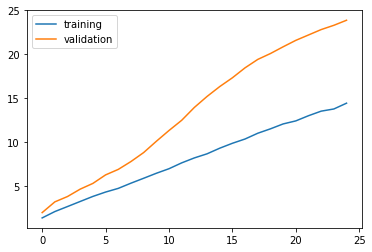

vgg_16_0.01_sgd_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/LearningRateVariation/vgg_16_0.01_sgd_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.199673  3.404826  0.392541  2.492030
1      1  0.351498  2.535580  0.448058  2.158636
2      2  0.400962  2.306192  0.477211  2.011683
3      3  0.429414  2.183206  0.523259  1.841527
4      4  0.446978  2.103474  0.527869  1.792269


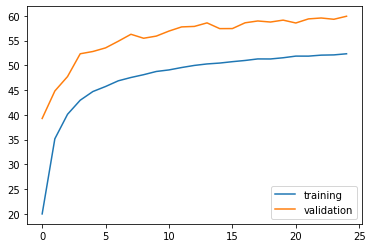


vgg_16_0.01_adam_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/OptimizerVariation/vgg_16_0.01_adam_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.099467  3.798676  0.195428  3.142870
1      1  0.107340  3.738183  0.192833  3.164304
2      2  0.102473  3.779104  0.169533  3.289433
3      3  0.095518  3.846466  0.147227  3.381083
4      4  0.088738  3.882880  0.169257  3.319198


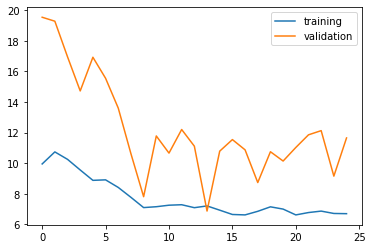

vgg_16_0.01_rmsprop_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/OptimizerVariation/vgg_16_0.01_rmsprop_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.090837  4.322641  0.102200  4.375572
1      1  0.075844  4.591438  0.086685  4.508824
2      2  0.071225  4.641574  0.093642  4.577287
3      3  0.070905  4.663868  0.091820  4.496677
4      4  0.073007  4.667330  0.097783  4.646305


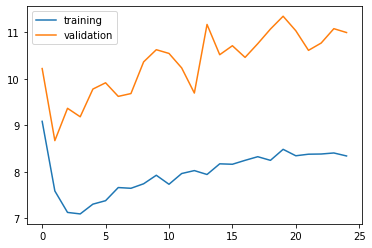


vgg_16_0.01_sgd_epochs_100_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/vgg_16_0.01_sgd_epochs_100_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.189174  3.450709  0.388565  2.519583
1      1  0.337812  2.591878  0.444276  2.198327
2      2  0.388299  2.361524  0.488888  1.989577
3      3  0.415796  2.239294  0.513486  1.890234
4      4  0.432885  2.162116  0.513817  1.859156


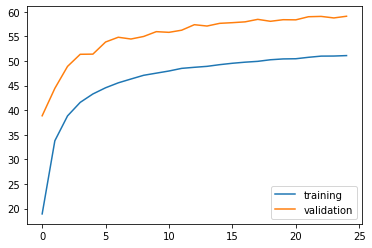


vgg_16_0.01_sgd_train_base_model_layers_True_training.log
/content/gdrive/My Drive/Purdue Course/Data Mining/vgg_16_0.01_sgd_train_base_model_layers_True_training.log
   epoch       acc      loss   val_acc  val_loss
0      0  0.749506  0.989883  0.896364  0.383448
1      1  0.902090  0.384577  0.927339  0.275111
2      2  0.922688  0.303228  0.934434  0.248871
3      3  0.933097  0.262289  0.941777  0.225734
4      4  0.940535  0.232197  0.945615  0.215749


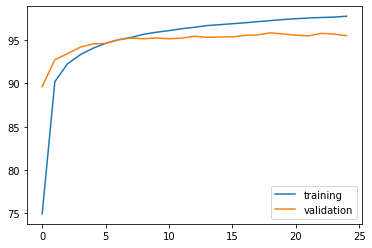

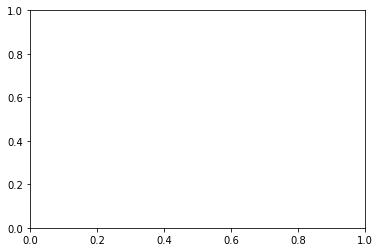

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


dir_list = [a for a in os.listdir(saving_dir) if os.path.isdir(saving_dir + '/' + a)]
for dir in dir_list:
    dir_path = saving_dir + '/' + dir
    file_list = [a for a in os.listdir(dir_path) if '.log' in a]
    for file in file_list:
        print(file)
        df = pd.read_csv(dir_path + '/' + file)
        print(dir_path + '/' + file)
        print(df.head())
        plt.plot(df['epoch'], df['acc']*100, label='training')
        plt.plot(df['epoch'], df['val_acc']*100, label='validation')
        plt.legend()
        plt.savefig(saving_dir + '/' + file.replace('_training.log', '.pdf'))
        files.download(saving_dir + '/' + file.replace('_training.log', '.pdf'))        
        plt.show()
        plt.cla()
    print()


dir_path = saving_dir
file_list = [a for a in os.listdir(saving_dir) if not os.path.isdir(saving_dir + '/' + a) and '.log' in a]
for file in file_list:
    print(file)
    df = pd.read_csv(dir_path + '/' + file)
    print(dir_path + '/' + file)
    print(df.head())
    plt.plot(df['epoch'], df['acc']*100, label='training')
    plt.plot(df['epoch'], df['val_acc']*100, label='validation')
    plt.legend()
    plt.savefig(saving_dir + '/' + file.replace('_training.log', '.pdf'))
    files.download(saving_dir + '/' + file.replace('_training.log', '.pdf'))        
    plt.show()
    plt.cla()
    print()

In [14]:
from keras.models import load_model

batch_size = 16
learning_rate = .01
base_model_type = 'vgg'
image_width, image_height = get_image_width_height(base_model_type)
optimizer = 'sgd'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_width, image_height),
        batch_size=batch_size,
        class_mode='categorical')

model = load_model(saving_dir + '/' + 'vgg_16_0.01_sgd_train_base_model_layers_True.hdf5')
model.summary()
#predictions = model.predict_generator(test_generator)
print(model.metrics_names)
print(model.evaluate_generator(test_generator))

Found 36374 images belonging to 122 classes.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 122)         

In [0]:
test_dirs = np.sort(os.listdir(test_dir))
count = 0
min = 3000
for dir in test_dirs:
    files = os.listdir(test_dir + '/' + dir)
    print(dir, len(files))
    if min > len(files):
        min = len(files)
    count = count + len(files)

print(count, min)

In [0]:
train_dirs = np.sort(os.listdir(train_dir))
count = 0
min = 3000
for dir in train_dirs:
    files = os.listdir(train_dir + '/' + dir)
    print(dir, len(files))
    if min > len(files):
        min = len(files)
    count = count + len(files)

print(count, min)

In [0]:
val_dirs = np.sort(os.listdir(val_dir))
count = 0
min = 3000
for dir in val_dirs:
    files = os.listdir(val_dir + '/' + dir)
    print(dir, len(files))
    if min > len(files):
        min = len(files)
    count = count + len(files)

print(count, min)

In [0]:
classes = np.sort(os.listdir(train_dir))
count = 0
min = 300000
for dir in classes:
    train_files = os.listdir(train_dir + '/' + dir)
    test_files = os.listdir(test_dir + '/' + dir)
    val_files = os.listdir(val_dir + '/' + dir)
    if min > len(train_files) + len(test_files) + len(val_files):
        min = len(train_files) + len(test_files) + len(val_files) 
    print(dir, len(train_files) + len(test_files) + len(val_files))
    count = count + len(train_files) + len(test_files) + len(val_files)

print(count, min)